# 52 Digitizing data from PyVista Meshes

The topography of an area can be visualized in 3D with PyVista. 
<img src="../images/tutorial52_cover.png">

## Set File Paths

If you downloaded the latest `GemGIS` from the Github repository, append the path so that the package can be imported successfully. In addition, the file path to the files within the `gemgis_data` folder is set. You can download the data [here](https://github.com/cgre-aachen/gemgis_data/archive/master.zip) if you have not done so.

In [10]:
import sys
sys.path.append('../../../../gemgis')
file_path ='../../../../gemgis_data/data/52_digitizing_data_from_pyvista_meshes/'

## Loading the data

A 50 m DEM of the Münsterland Basin is loaded to illustrate the visualizing of topography in PyVista. The data will be used under Datenlizenz Deutschland – Zero – Version 2.0. It was obtained from the WCS Service https://www.wcs.nrw.de/geobasis/wcs_nw_dgm. The data will automatically be converted to a StructuredGrid with ``Elevation [m]`` as data array.


In [2]:
import gemgis as gg
import pyvista as pv

mesh = gg.visualization.read_raster(path=file_path + 'DEM50.tif', 
                                    nodata_val=9999.0,
                                    name='Elevation [m]')

mesh

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


StructuredGrid (0x1e06aafa6a0)
  N Cells:	5595201
  N Points:	5600000
  X Bounds:	3.236e+07, 3.250e+07
  Y Bounds:	5.700e+06, 5.800e+06
  Z Bounds:	0.000e+00, 0.000e+00
  Dimensions:	2000, 2800, 1
  N Arrays:	1

## Plotting the data in 2D

In [3]:
import rasterio

dem = rasterio.open(file_path + 'DEM50.tif')
dem.read(1)

array([[  0.  ,   0.  ,   0.  , ...,  40.1 ,  40.09,  44.58],
       [  0.  ,   0.  ,   0.  , ...,  40.08,  40.07,  44.21],
       [  0.  ,   0.  ,   0.  , ...,  40.14,  44.21,  43.98],
       ...,
       [100.56, 102.14, 102.17, ...,   0.  ,   0.  ,   0.  ],
       [ 99.44,  99.85,  99.77, ...,   0.  ,   0.  ,   0.  ],
       [ 88.32,  91.76,  98.68, ...,   0.  ,   0.  ,   0.  ]],
      dtype=float32)

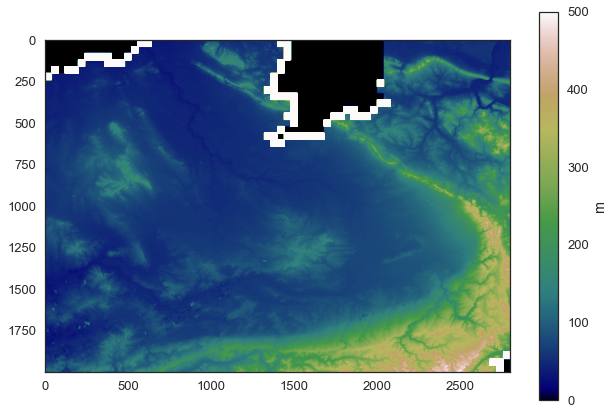

In [4]:
import matplotlib.pyplot as plt

im = plt.imshow(dem.read(1), cmap='gist_earth', vmin=0, vmax=500)
cbar = plt.colorbar(im)
cbar.set_label('m')

## Wrap Mesh by Scalars

The dataset’s points are wrapped by a point data scalars array’s values.

In [5]:
topo = mesh.warp_by_scalar(scalars="Elevation [m]", factor=1.0)

topo

StructuredGrid (0x1e00adb9dc0)
  N Cells:	5595201
  N Points:	5600000
  X Bounds:	3.236e+07, 3.250e+07
  Y Bounds:	5.700e+06, 5.800e+06
  Z Bounds:	0.000e+00, 5.038e+02
  Dimensions:	2000, 2800, 1
  N Arrays:	1

## Plotting the Mesh

The mesh can then easily be plotted with PyVista

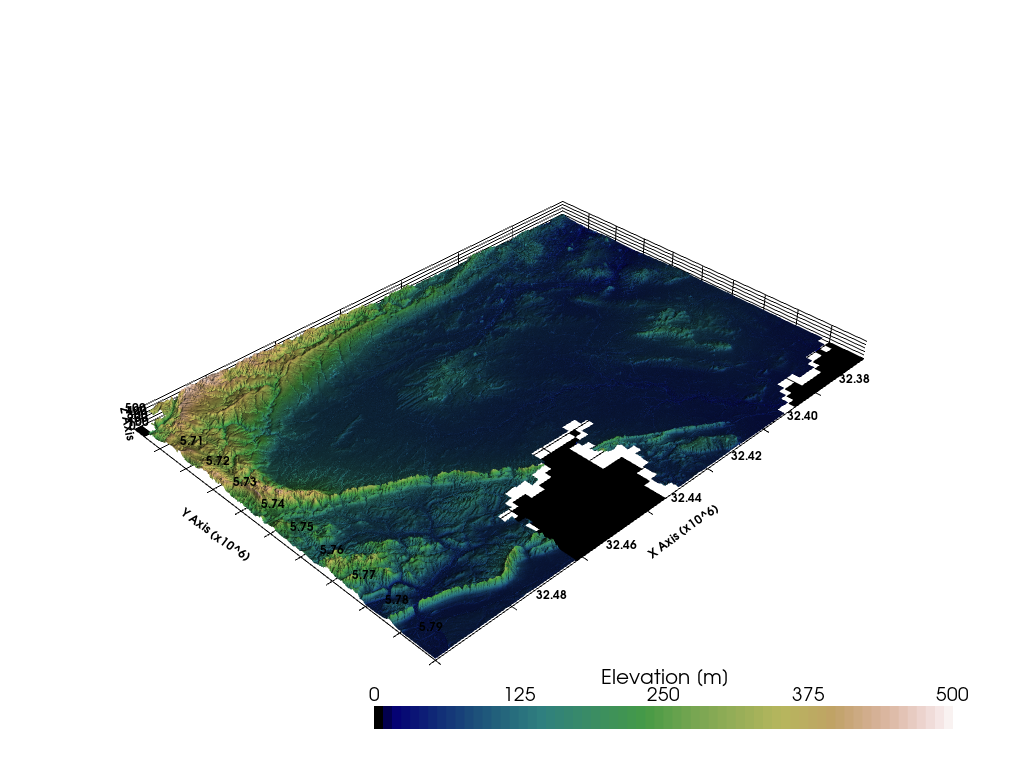

In [6]:
sargs = dict(fmt="%.0f", color='black')


p = pv.Plotter(notebook=True)
p.add_mesh(mesh=topo, cmap='gist_earth', scalar_bar_args=sargs, clim=[-0, 500])

p.set_background('white')
p.show_grid(color='black')
p.set_scale(1,1,10)
p.show()

In [7]:
p = pv.Plotter(notebook=0)
p.add_mesh(pv.Sphere(), show_edges=True)
p.enable_geodesic_picking()
p.show()

[(1.9410089246532642, 1.9117894925560552, 1.9264378181907793),
 (0.0, 0.0, 0.0),
 (-0.4096375714326179, -0.4068542655596967, 0.8164965809277261)]

In [21]:
sargs = dict(fmt="%.0f", color='black')


p = pv.Plotter(notebook=False)
p.add_mesh(mesh=topo, cmap='gist_earth', scalar_bar_args=sargs, clim=[-0, 500])

p.enable_geodesic_picking(show_message=True)

p.set_background('white')
p.show_grid(color='black')
p.set_scale(1,1,10)
p.show()

[(32513908.06643164, 5851789.661366982, 30759.992596354175),
 (32430000.0, 5750000.0, 251.9149932861328),
 (-0.732512038854102, -0.5593046377635457, 0.3880778724817944)]

In [12]:
p.picked_geodesic

PolyData,Information
N Cells,0
N Points,0
X Bounds,"1.000e+00, -1.000e+00"
Y Bounds,"1.000e+00, -1.000e+00"
Z Bounds,"1.000e+00, -1.000e+00"
N Arrays,0
